AZIIZAH OKI SHOFRINA <br>
2109106004 <br>
INFORMATIKA A'21

### Import Modul

In [1]:
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

### Import Dataset

In [3]:
df = pd.read_csv("file_CSV.csv")

df.head()

,Unnamed: 0,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,4.993115,275.364098,6.0,...,48.944618,44.163532,3.99266,7.662759,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,4.993115,275.364098,5.8,...,48.944618,44.163532,3.99266,7.662759,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,4.993115,275.364098,6.2,...,48.944618,44.163532,3.99266,7.662759,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,4.993115,275.364098,5.8,...,48.944618,44.163532,3.99266,7.662759,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,4.993115,275.364098,5.8,...,48.944618,44.163532,3.99266,7.662759,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


#### Kolom angka yang dapat digunakan sebagai predictor

In [4]:
df.select_dtypes(include=["float64", "int64"]).columns

Index(['Unnamed: 0', 'Latitude', 'Longitude', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Error',
       'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
       'Horizontal Error', 'Root Mean Square'],
      dtype='object')

#### Kolom string yang dapat digunakan sebagai target

In [5]:
df.select_dtypes(include=["object"]).columns

Index(['Date', 'Time', 'Type', 'Magnitude Type', 'ID', 'Source',
       'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

### Subset dan Data Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

# X = "Magnitude"
# Y = "Magnitude Seismic Stations"
# kategori = "Magnitude Type"

df_subset = df[["Magnitude", "Magnitude Seismic Stations"]]

x_scaled = StandardScaler().fit_transform(df_subset)
x_scaled

array([[ 2.77667918e-01,  3.41182688e-16],
       [-1.95082059e-01,  3.41182688e-16],
       [ 7.50417896e-01,  3.41182688e-16],
       ...,
       [ 4.12929295e-02,  3.41182688e-16],
       [ 9.86792884e-01,  3.41182688e-16],
       [-9.04207025e-01,  1.82011761e+01]])

# K-Means Clustering

In [7]:
from sklearn.cluster import KMeans

model = KMeans(
    n_clusters=len(df["Magnitude Type"].unique())
).fit(x_scaled)

model

KMeans(n_clusters=10)

### Buat Label

In [8]:
labels = model.labels_
labels

array([6, 6, 9, ..., 6, 9, 7])

### Buat Cross Tab

In [9]:
df_kmeans = pd.DataFrame(
    {
        "Labels": labels,
        "Magnitude Type": df["Magnitude Type"]
    }
)

ct = pd.crosstab(
    df_kmeans["Labels"], 
    df_kmeans["Magnitude Type"]
)
ct

Magnitude Type,MB,MD,MH,ML,MS,MW,MWB,MWC,MWR,MWW
Labels,,,,,,,,,,
0,573,5,2,65,471,34,81,5,2,0
1,1844,0,0,6,401,3419,993,3099,19,696
2,44,1,1,1,230,838,265,474,0,253
3,75,0,0,1,3,0,0,0,0,0
4,147,0,0,1,5,0,0,0,0,0
5,0,0,2,0,94,305,45,187,0,105
6,582,0,0,2,297,2061,658,1291,3,609
7,12,0,0,0,0,0,0,0,0,0
8,335,0,0,0,6,0,9,0,0,0


### Visualisasi Centroid

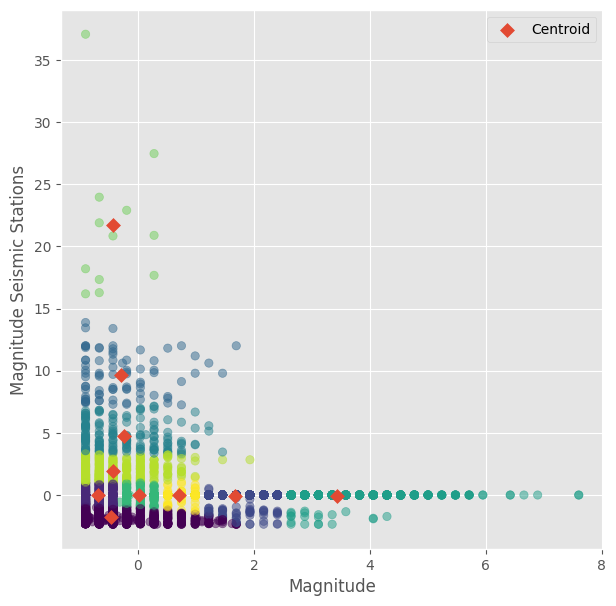

In [10]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

centroids = model.cluster_centers_

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

plt.figure(figsize=(7, 7))

plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.scatter(
    centroids_x, centroids_y, 
    label="Centroid", 
    marker="D", 
    s=50
)

plt.xlabel("Magnitude")
plt.ylabel("Magnitude Seismic Stations")
plt.legend()

plt.show()


## Label Aktual

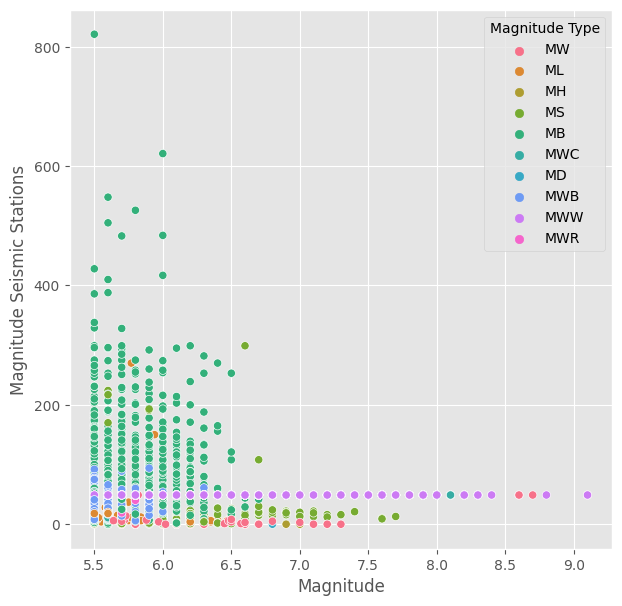

In [11]:
import seaborn as sns

df_aktual = df[["Magnitude", "Magnitude Seismic Stations", "Magnitude Type"]]

plt.figure(figsize=(7, 7))
sns.scatterplot(
    x="Magnitude",
    y="Magnitude Seismic Stations",
    data=df_aktual,
    hue="Magnitude Type"
)

plt.show()


## Menentukan Jumlah Cluster (Elbow Method)

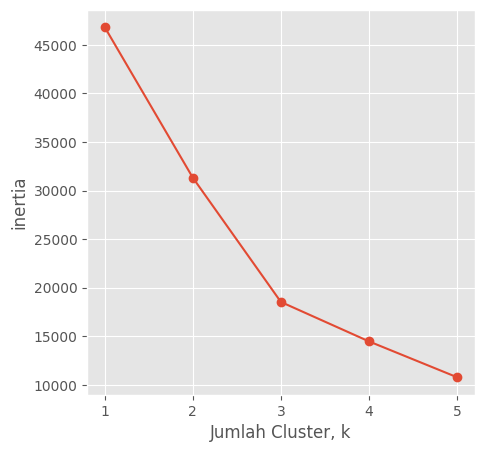

In [12]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)

# plot ks vs inertias
plt.figure(figsize=(5, 5))
plt.plot(ks, inertias, '-o')
plt.xlabel("Jumlah Cluster, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()


## Evaluasi K-Means

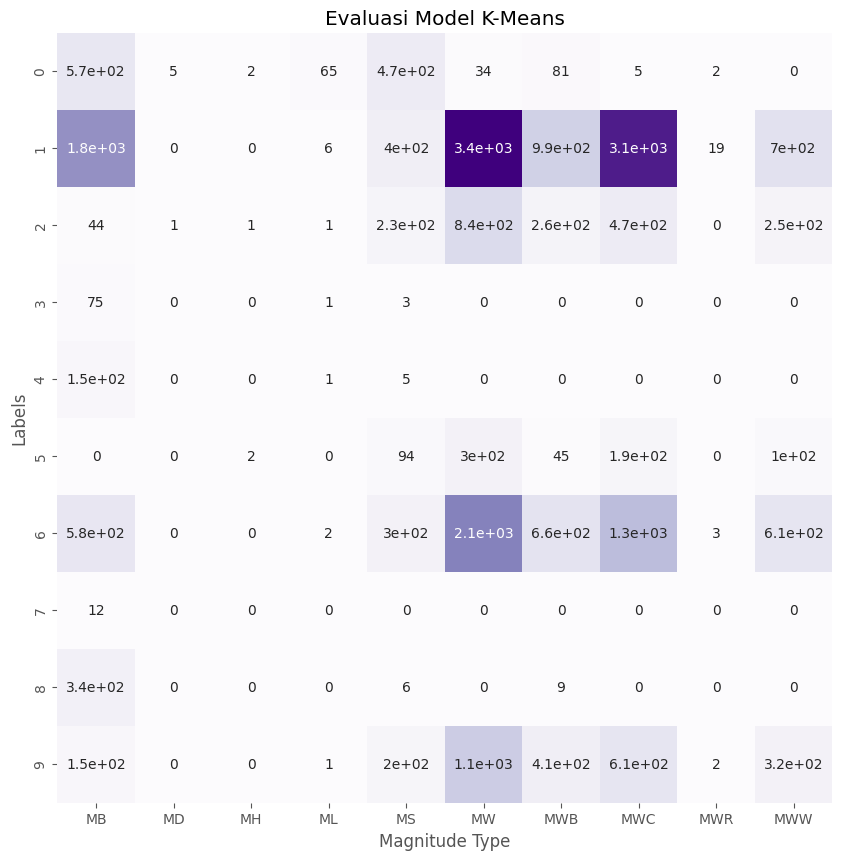

In [13]:
plt.figure(figsize=(10, 10))

sns.heatmap(
    ct,
    annot=True,
    cbar=False,
    cmap="Purples"
)
plt.title("Evaluasi Model K-Means")
plt.show()